In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np 
from tensorflow.keras import datasets,layers,models,utils
import tensorflow as tf
import pandas as pd

In [ ]:
gpus = tf.config.experimental.list_physical_devices("GPU")
len(gpus)

1

In [ ]:
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
data = utils.image_dataset_from_directory("/content/drive/MyDrive/CV2023CSYSDataset/Breast scans train")

Found 681 files belonging to 3 classes.


In [ ]:
data = data.map(lambda x,y:(x/255, y))

In [ ]:
train_size = int(len(data) * 0.8)
val_size = int(len(data) * 0.2) +1

In [ ]:
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)

In [ ]:
test_data = utils.image_dataset_from_directory("/content/drive/MyDrive/CV2023CSYSDataset/Breast scans test")
test_data = test_data.map(lambda x,y:(x/255, y))
test_data = test_data.take(len(test_data))

Found 99 files belonging to 3 classes.


In [ ]:
model = models.Sequential()

In [ ]:
#Layer 1
model.add(layers.Conv2D(16, (3,3), 1, activation = "relu", input_shape = (256,256,3)))
model.add(layers.MaxPooling2D())
#Layer 2
model.add(layers.Conv2D(32, (3,3), 1, activation = "relu"))
model.add(layers.MaxPooling2D())
#Layer 3
model.add(layers.Conv2D(16, (3,3), 1, activation = "relu"))
model.add(layers.MaxPooling2D())
#Final Layer
model.add(layers.Flatten())
#Fully Connected
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))

In [ ]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
logdir = '/content/drive/MyDrive/CV2023CSYSDataset/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit(train_data, epochs = 20, validation_data = val_data, callbacks = [tensorboard_callback])

Epoch 1/20
17/17 [==============================] - 14s 542ms/step - loss: 0.9337 - accuracy: 0.6158 - val_loss: 0.9106 - val_accuracy: 0.5255
Epoch 2/20
17/17 [==============================] - 16s 889ms/step - loss: 0.7907 - accuracy: 0.6654 - val_loss: 0.7327 - val_accuracy: 0.7153
Epoch 3/20
17/17 [==============================] - 15s 822ms/step - loss: 0.7000 - accuracy: 0.6838 - val_loss: 0.6600 - val_accuracy: 0.6934
Epoch 4/20
17/17 [==============================] - 10s 498ms/step - loss: 0.5491 - accuracy: 0.7665 - val_loss: 0.4147 - val_accuracy: 0.8467
Epoch 5/20
17/17 [==============================] - 10s 498ms/step - loss: 0.3801 - accuracy: 0.8456 - val_loss: 0.2669 - val_accuracy: 0.9124
Epoch 6/20
17/17 [==============================] - 10s 499ms/step - loss: 0.2343 - accuracy: 0.9136 - val_loss: 0.2251 - val_accuracy: 0.9124
Epoch 7/20
17/17 [==============================] - 10s 501ms/step - loss: 0.2212 - accuracy: 0.9228 - val_loss: 0.2179 - val_accuracy: 0.9270

In [ ]:
hist.history

{'loss': [0.9336738586425781,
  0.7906802892684937,
  0.6999703049659729,
  0.5491018295288086,
  0.3800866901874542,
  0.23425231873989105,
  0.22118686139583588,
  0.16380003094673157,
  0.0928230956196785,
  0.053673774003982544,
  0.03578950837254524,
  0.02460000477731228,
  0.010177758522331715,
  0.008261033333837986,
  0.026383325457572937,
  0.022430123761296272,
  0.009467586874961853,
  0.009024407714605331,
  0.012254214845597744,
  0.017607031390070915],
 'accuracy': [0.6158088445663452,
  0.6654411554336548,
  0.6838235259056091,
  0.7665441036224365,
  0.845588207244873,
  0.9136029481887817,
  0.9227941036224365,
  0.9522058963775635,
  0.9632353186607361,
  0.9779411554336548,
  0.9926470518112183,
  0.9944853186607361,
  1.0,
  0.998161792755127,
  0.9944853186607361,
  0.9926470518112183,
  0.998161792755127,
  0.998161792755127,
  0.9963235259056091,
  0.9963235259056091],
 'val_loss': [0.9106011986732483,
  0.7327209115028381,
  0.6599723100662231,
  0.414665579795

In [ ]:
model.save("/content/drive/MyDrive/CV2023CSYSDataset/BreastNN")

In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/CV2023CSYSDataset/BreastNN')

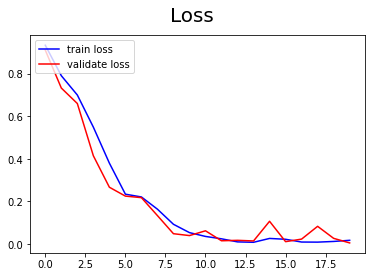

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='train loss')
plt.plot(hist.history['val_loss'], color='red', label='validate loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

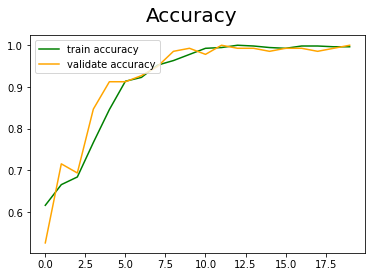

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='train accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='validate accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
accuracy = tf.keras.metrics.Accuracy()

In [ ]:
accuracies = []
for batch in test_data.as_numpy_iterator():
  x,y = batch
  y_pred = model.predict(x)
  acc = accuracy.update_state(y, y_pred[:,0])
  accuracies.append(acc)

1/1 [==============================] - 0s 174ms/step


In [ ]:
float(accuracies[3])

99.0

In [ ]:
test_benign = tf.image.resize(cv2.imread("/content/drive/MyDrive/CV2023CSYSDataset/Breast scans/benign/Test/benign (429).png"), (256,256))
test_malignant = tf.image.resize(cv2.imread("/content/drive/MyDrive/CV2023CSYSDataset/Breast scans/malignant/Test/malignant (204).png"), (256,256))
test_normal = tf.image.resize(cv2.imread("/content/drive/MyDrive/CV2023CSYSDataset/Breast scans/normal/Test/normal (131).png"), (256,256))

In [ ]:
pred_benign = loaded_model.predict(np.expand_dims(test_benign / 255 , 0)).tolist()
pred_malignant = loaded_model.predict(np.expand_dims(test_malignant / 255 , 0)).tolist()
pred_normal = loaded_model.predict(np.expand_dims(test_normal / 255 , 0)).tolist()

1/1 [==============================] - 0s 18ms/step


In [ ]:
pred_malignant[0].index(max(pred_malignant[0]))

1